In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

In [2]:
data = pd.read_csv("Cust_Segmentation.csv")

In [4]:
print(data.columns)


Index(['Customer Id', 'Age', 'Edu', 'Years Employed', 'Income', 'Card Debt',
       'Other Debt', 'Defaulted', 'Address', 'DebtIncomeRatio'],
      dtype='object')


In [5]:
features = data[['Age', 'Income', 'DebtIncomeRatio']]

In [6]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)

In [8]:
k = 4   # Choose number of clusters

kmeans_euc = KMeans(n_clusters=k, random_state=42)
labels_euclidean = kmeans_euc.fit_predict(scaled_data)

print("\n Cluster Centers (Euclidean):")
print(kmeans_euc.cluster_centers_)


 Cluster Centers (Euclidean):
[[ 0.93599517  0.15513989 -0.35424483]
 [ 1.21950265  2.91549183 -0.12642501]
 [-0.75371045 -0.43296794 -0.45265567]
 [-0.21966315 -0.2247756   1.46746717]]


In [10]:
def kmeans_manhattan(X, k, max_iter=100):
    np.random.seed(42)
    centroids = X[np.random.choice(range(len(X)), k, replace=False)]

    for _ in range(max_iter):
        labels = pairwise_distances_argmin(X, centroids, metric='manhattan')
        new_centroids = np.array([X[labels == j].mean(axis=0) for j in range(k)])
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids
    return labels, centroids

labels_manhattan, centroids_manhattan = kmeans_manhattan(scaled_data, k)

print("\n Cluster Centers (Manhattan):")
print(centroids_manhattan)


 Cluster Centers (Manhattan):
[[-0.6353106  -0.35086813  1.40903854]
 [ 1.12425952  0.31248232  0.781444  ]
 [ 1.04522574  1.26988004 -0.71001933]
 [-0.50166918 -0.40760705 -0.49576358]]


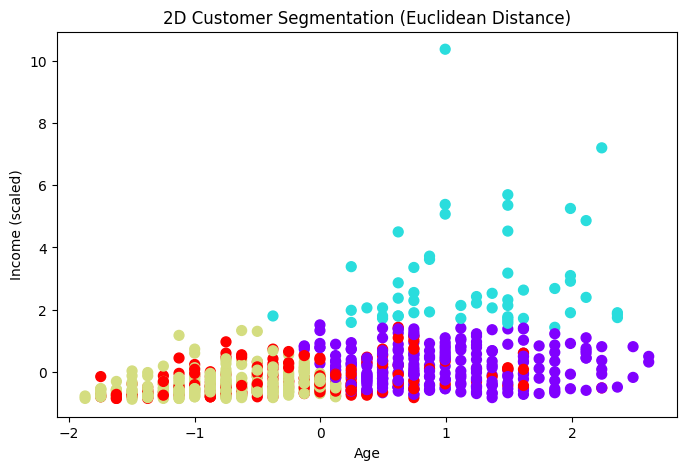

In [11]:
plt.figure(figsize=(8,5))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=labels_euclidean, cmap='rainbow', s=50)
plt.xlabel("Age")
plt.ylabel("Income (scaled)")
plt.title("2D Customer Segmentation (Euclidean Distance)")
plt.show()

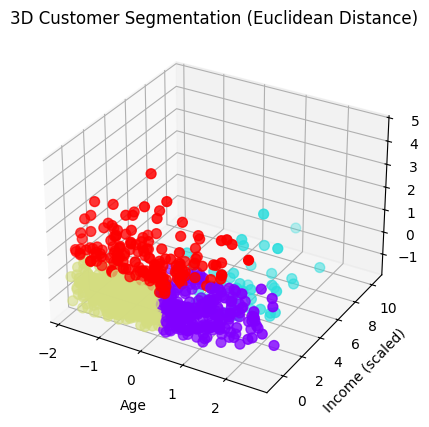

In [12]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(scaled_data[:, 0], scaled_data[:, 1], scaled_data[:, 2],
           c=labels_euclidean, cmap='rainbow', s=50)
ax.set_xlabel("Age")
ax.set_ylabel("Income (scaled)")
ax.set_zlabel("Debt-to-Income Ratio (scaled)")
ax.set_title("3D Customer Segmentation (Euclidean Distance)")
plt.show()

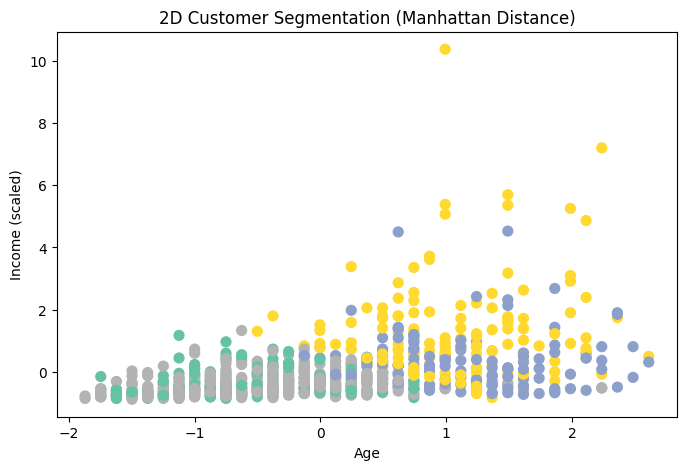

In [13]:
plt.figure(figsize=(8,5))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=labels_manhattan, cmap='Set2', s=50)
plt.xlabel("Age")
plt.ylabel("Income (scaled)")
plt.title("2D Customer Segmentation (Manhattan Distance)")
plt.show()